## COHORT_ANALYSIS_pf

In [1]:
import numpy as np
import pandas as pd 
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from operator import attrgetter

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#df_pf = pd.read_csv('PF_tratados.csv')
df = pd.read_csv('/home/hub/Área de Trabalho/dados/PF_tratados.csv')
df.head()

,ID Cliente,Linha de Ação,Produto GPOM,Data de Venda,Classe de Serviço,Data de Nascimento,Gênero,Cidade,Microrregião,Estado,Fim de Vigência,Tipo Pessoa,Área de Atuação,Área de Atuação e Produto GPOM,Idade,Tempo de Contrato,Longitude,Latitude
0,56943,EDUCACAO,COLEGIO SESI NOVO ENSINO MEDIO,2022-10-28,ENSINO MEDIO – ITINERARIOS,2008-05-16,MASCULINO,CURITIBA,CURITIBA,PR,2023-12-15,FÍSICA,NÃO INFORMADO,COLEGIO SESI NOVO ENSINO MEDIO / NÃO INFORMADO,14,413,-49.264622,-25.419547
1,19906,EDUCACAO,EDUCACAO INFANTIL,2023-01-13,EDUCACAO INFANTIL - PRE-ESCOLA,1981-08-13,FEMININO,CURITIBA,CURITIBA,PR,2023-12-25,FÍSICA,NÃO INFORMADO,EDUCACAO INFANTIL / NÃO INFORMADO,41,346,-49.264622,-25.419547
2,19906,EDUCACAO,ENSINO FUNDAMENTAL INTERNACIONAL,2021-10-07,ENSINO FUNDAMENTAL - 1º AO 5º ANO,1981-08-13,FEMININO,CURITIBA,CURITIBA,PR,2022-12-14,FÍSICA,NÃO INFORMADO,ENSINO FUNDAMENTAL INTERNACIONAL / NÃO INFORMADO,40,433,-49.264622,-25.419547
3,19906,EDUCACAO,ENSINO FUNDAMENTAL INTERNACIONAL,2023-01-13,ENSINO FUNDAMENTAL - 1º AO 5º ANO,1981-08-13,FEMININO,CURITIBA,CURITIBA,PR,2023-12-25,FÍSICA,NÃO INFORMADO,ENSINO FUNDAMENTAL INTERNACIONAL / NÃO INFORMADO,41,346,-49.264622,-25.419547
4,6940,EDUCACAO,COLEGIO SESI INTERNACIONAL,2021-10-14,ENSINO MEDIO,2006-11-01,FEMININO,CURITIBA,CURITIBA,PR,2022-12-14,FÍSICA,NÃO INFORMADO,COLEGIO SESI INTERNACIONAL / NÃO INFORMADO,14,426,-49.264622,-25.419547


In [3]:
df.describe()

,ID Cliente,Idade,Tempo de Contrato,Longitude,Latitude
count,83872.000000,83872.000000,83872.000000,83872.000000,83872.000000
mean,50536.946168,24.114246,199.312572,-50.423982,-24.960591
std,28783.428804,10.221776,156.797041,1.634769,1.042054
min,4.000000,0.000000,-666.000000,-70.772154,-31.764898
25%,25930.000000,16.000000,139.000000,-51.462317,-25.442949
50%,50901.500000,21.000000,166.000000,-49.307310,-25.419547
75%,74989.000000,30.000000,221.000000,-49.264622,-24.557891
max,99999.000000,78.000000,28282.000000,-34.864121,2.823842


## Cohort Analisis

**Para análise de coorte, precisamos de três rótulos: sales date, cohort group and cohort period/index**

In [4]:
df['Data de Venda'] = pd.to_datetime(df['Data de Venda'], format='%Y/%m/%d')

**Criando as variáveis cohort e order_month. Cohort é o coorte mensal com base na primeira data de compra e o order_month é o mês truncado da data de compra**

In [5]:
df['order_month'] = df['Data de Venda'].dt.to_period('M')

In [6]:
df['cohort'] = df.groupby('ID Cliente')['Data de Venda'].transform('min').dt.to_period('M')

Agregando os dados por cohort e order_month e contando o número de clientes únicos em cada grupo.

In [7]:
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('ID Cliente', 'nunique')).reset_index(drop=False)

In [8]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [9]:
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2021-01,2021-01,2927,0
1,2021-01,2021-02,663,1
2,2021-01,2021-03,314,2
3,2021-01,2021-04,466,3
4,2021-01,2021-05,227,4


**Agregando os dados por cohort e order_month e contar o número de clientes únicos em cada grupo**

In [10]:
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')

In [11]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
cohort,,,,,,,,,,,,,,,,,,,,,
2021-01,2927.0,663.0,314.0,466.0,227.0,498.0,1449.0,536.0,448.0,624.0,...,789.0,454.0,244.0,207.0,243.0,1405.0,499.0,403.0,626.0,427.0
2021-02,1659.0,164.0,234.0,106.0,255.0,747.0,333.0,226.0,319.0,268.0,...,248.0,125.0,110.0,133.0,740.0,231.0,232.0,341.0,208.0,NaN
2021-03,643.0,90.0,32.0,50.0,183.0,117.0,140.0,151.0,102.0,93.0,...,37.0,43.0,34.0,230.0,78.0,72.0,125.0,68.0,NaN,NaN
2021-04,891.0,65.0,73.0,178.0,82.0,149.0,270.0,102.0,134.0,184.0,...,56.0,53.0,303.0,106.0,90.0,144.0,79.0,NaN,NaN,NaN
2021-05,383.0,31.0,67.0,43.0,22.0,42.0,38.0,82.0,88.0,78.0,...,20.0,123.0,43.0,34.0,60.0,41.0,NaN,NaN,NaN,NaN
2021-06,492.0,66.0,39.0,38.0,64.0,61.0,132.0,148.0,91.0,46.0,...,172.0,67.0,50.0,73.0,37.0,NaN,NaN,NaN,NaN,NaN
2021-07,899.0,63.0,82.0,80.0,90.0,262.0,257.0,169.0,93.0,60.0,...,98.0,99.0,135.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,477.0,29.0,49.0,29.0,80.0,129.0,82.0,50.0,28.0,31.0,...,49.0,72.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,363.0,33.0,32.0,27.0,68.0,55.0,35.0,17.0,27.0,33.0,...,68.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Convertendo a tabela para ver com mais clareza**

In [12]:
cohort_size = cohort_pivot.iloc[:, 0]

In [13]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

**Matriz de retenção como um mapa de calor**

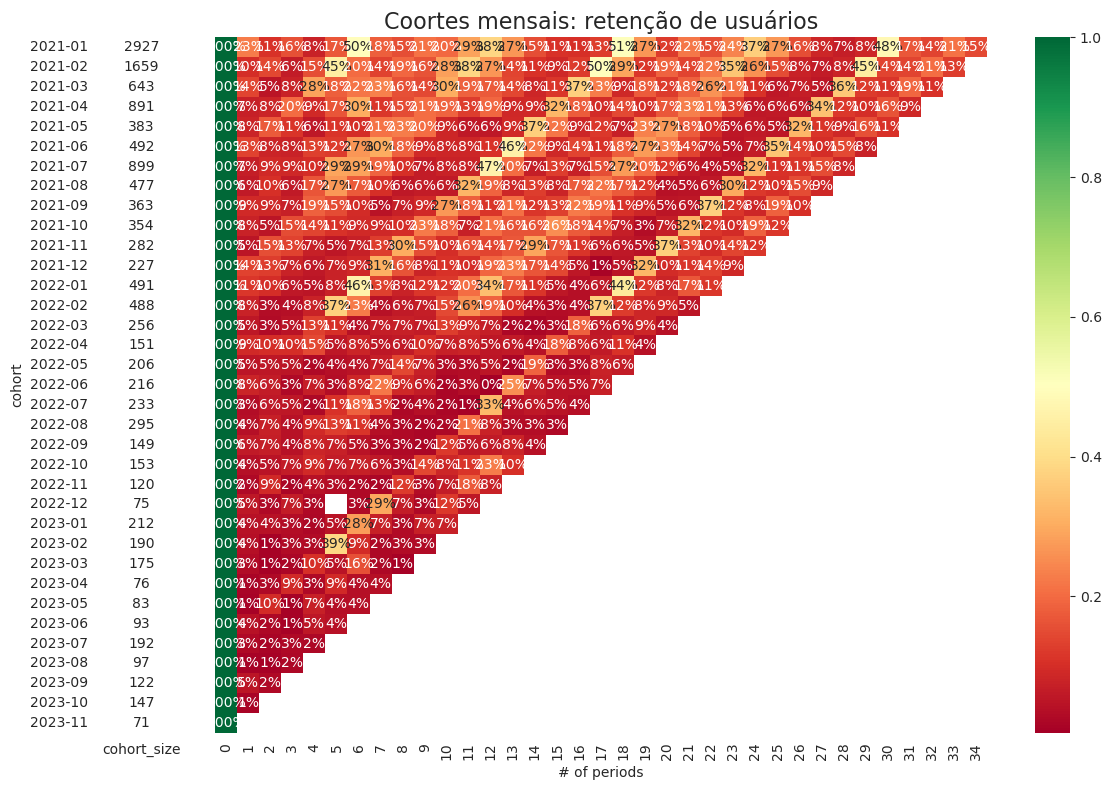

In [14]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Coortes mensais: retenção de usuários', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

**Engajamento por usuário ao longo do tempo**

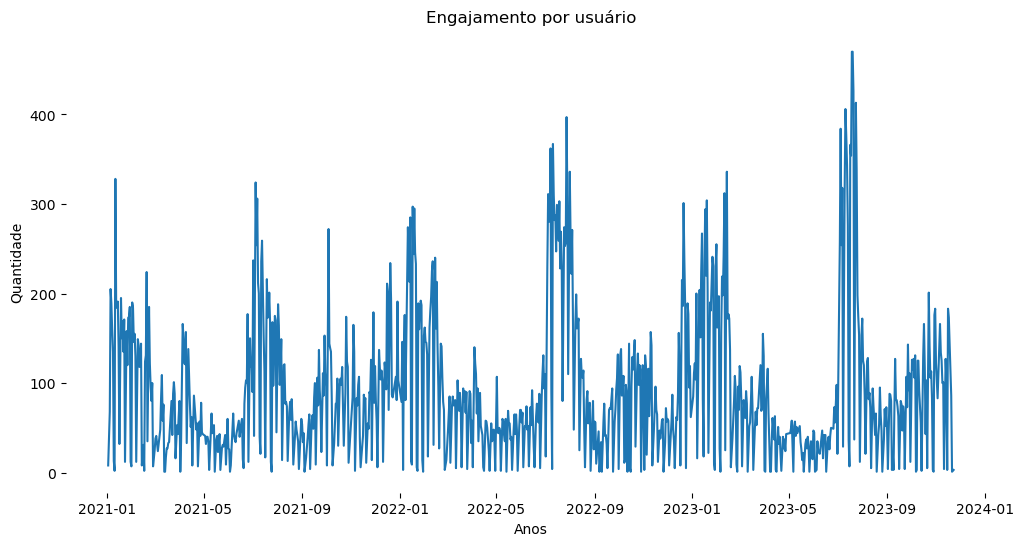

In [15]:
plt.figure(figsize=(12, 6))
aux = df[['ID Cliente', 'Data de Venda']].groupby('Data de Venda', as_index = False).count()
sns.lineplot(data = aux, x = 'Data de Venda', y = 'ID Cliente')
plt.title('Engajamento por usuário')


sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10);